In [1]:
import os
import glob
import io
import pandas as pd
import tableprint
import sys
from io import StringIO
import json

# Bringing in all hourly files from 10/08/2017

In [2]:
Found = [24248320, #cowboys
25100288, #oakland
25165824, #eagles
2490368, # seattle
24444928, #packers
25624576, #New Orleans
25493504, #Washington
24707072, #Kansas City
24969216, #NY Giants
25231360, # PITT
24051712, # Chicago
2097152, # Tennessee
23920640, #buffalo
24379392, #lions
24313856,  #broncos
25427968, #rams
25362432, #san francisco
24903680, # patriots
23986176, # panthers
23855104, # baltimore
24117248, # bengals
23789568, # atlanta falcons
24641536, # Jacksonville Jags
24838144, # Minnesota
24576000, # Colts
24510464, # Houston
24182784, # CLE
25034752, # NY Jets
25690112, # Tampa Bay
24772608, # Miami
25296896, # LA Chargers
23724032] # Arizona

# big_df = big_df[big_df.siteKey.isin(Found)]  # moving into For Loop below to manage big_df size (rename to medium_df?)
# including the  ~  performs opposite operation... is NOT in
#big_df = big_df[~big_df.siteKey.isin(Found)]


In [3]:
Sunday_big_df = [[]]
files = []
for root, dirs, files in os.walk('rawdata/10-08/'):
    files += glob.glob(os.path.join(root, '*.*'))

Sunday_big_df = pd.DataFrame()
df_working_clean = []

for i in files: 
    temp = open('rawdata/10-08/'+i,'r', encoding="utf-8")
    df_working = temp.read()
    df_working = df_working.replace('}{', '}\n{')
    df_working = df_working.splitlines()
    
    for record in df_working:
        rec = json.loads('{' + record[1:-1] + '}')
        df_working_clean.append(rec)


In [4]:
## cleaning ##
df_temp = pd.DataFrame(df_working_clean)
df_temp = df_temp.drop(['authorKey', 'contentKey', 'pathRoot', 'publishedDate', 'referrer','userAgent', 'userId'], axis=1)
df_temp['visit_hr'] = df_temp['timeStamp'].astype(str).str[-12:-10]
df_temp['visit_min'] = df_temp['timeStamp'].astype(str).str[-11:-9]
df_temp = df_temp[df_temp.siteKey.isin(Found)]
Sunday_big_df = pd.DataFrame(Sunday_big_df.append(df_temp, ignore_index = True))    

In [7]:
Monday_big_df = [[]]
files = []
for root, dirs, files in os.walk('rawdata/10-09/'):
    files += glob.glob(os.path.join(root, '*.*'))

Monday_big_df = pd.DataFrame()
df_working_clean = []

for i in files: 
    temp2 = open('rawdata/10-09/'+i,'r', encoding="utf-8")
    df_working = temp2.read()
    df_working = df_working.replace('}{', '}\n{')
    df_working = df_working.splitlines()
    
    for record in df_working:
        rec = json.loads('{' + record[1:-1] + '}')
        df_working_clean.append(rec)

In [8]:
## cleaning ##
df_temp = pd.DataFrame(df_working_clean)
df_temp = df_temp.drop(['authorKey', 'contentKey', 'pathRoot', 'publishedDate', 'referrer','userAgent', 'userId'], axis=1)
df_temp['visit_hr'] = df_temp['timeStamp'].astype(str).str[-12:-10]
df_temp['visit_min'] = df_temp['timeStamp'].astype(str).str[-11:-9]
df_temp = df_temp[df_temp.siteKey.isin(Found)]
Monday_big_df = pd.DataFrame(Monday_big_df.append(df_temp, ignore_index = True))    

In [72]:
Sunday = Sunday_big_df.groupby(['siteKey','visit_hr'], as_index=False).count()
Sunday['counts'] = Sunday['timeStamp']
Sunday = Sunday.drop(['timeStamp'], axis=1)
Sunday = Sunday.drop(['visit_min'], axis=1)
Sunday = Sunday.drop(['userStatus'], axis=1)
Sunday['visit_hr'] = (Sunday['visit_hr'].apply(pd.to_numeric))-6  # adjusting UTC to CST during DST
Sunday = Sunday[Sunday.visit_hr > 0]

In [73]:
Monday = Monday_big_df.groupby(['siteKey','visit_hr'], as_index=False).count()
Monday['counts'] = Monday['timeStamp']
Monday = Monday.drop(['timeStamp'], axis=1)
Monday = Monday.drop(['visit_min'], axis=1)
Monday = Monday.drop(['userStatus'], axis=1)

# need to add 18 to account for Sunday night hours
Monday['visit_hr'] = (Monday['visit_hr'].apply(pd.to_numeric))+18  # adjusting UTC to CST during DST
Monday = Monday[Monday.visit_hr < 24]


In [89]:
frames = [Sunday,Monday]
Sunday_full = pd.concat(frames)
Sunday_full = Sunday_full.dropna(subset = ['visit_hr'])

In [99]:
Sunday_full['siteKey'] = Sunday_full['siteKey'].replace(dict_site, dict_team)
Sunday_full.head(n=50)

,siteKey,visit_hr,counts
7,Titans,1.0,273
8,Titans,2.0,228
9,Titans,3.0,127
10,Titans,4.0,530
11,Titans,5.0,608
12,Titans,6.0,980
13,Titans,7.0,398
14,Titans,8.0,554
15,Titans,9.0,1537
16,Titans,10.0,4296


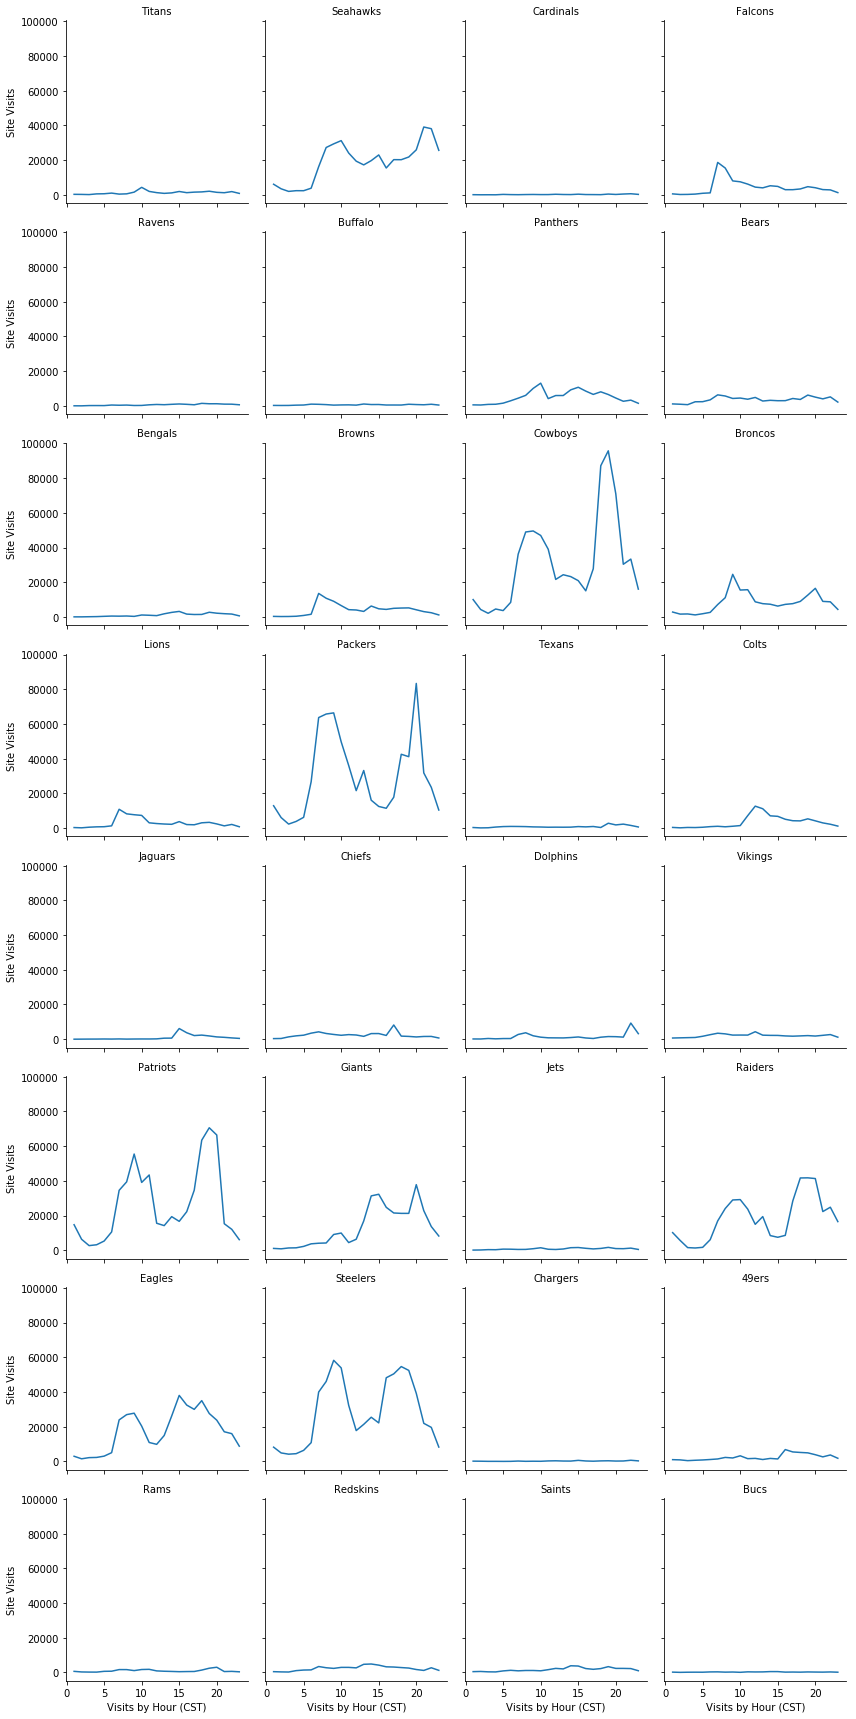

In [104]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline  

g = sns.FacetGrid(Sunday_full, col='siteKey', col_wrap=4)
g = g.map(plt.plot, 'visit_hr', 'counts').set_axis_labels("Visits by Hour (CST)", "Site Visits").set_titles("{col_name}")


# testing and old code below

In [ ]:
'''# testing Date/Time Conversion
from time import gmtime, strftime, strptime
from datetime import datetime

string = 'Sun, 08 Oct 2017 17:59:23 GMT'

GMT_offset = 5
string_hour_2 = (datetime.strptime(string, "%a, %d %b %Y %H:%M:%S %Z").hour)-GMT_offset
string_hour_2
'''

In [ ]:
'''# testing Date/Time Conversion
from time import gmtime, strftime, strptime

from datetime import datetime
GMT_offset = 5
time_test = big_df
time_test['hour'] = pd.to_datetime(time_test['timeStamp'])
time_test.head()
'''

In [95]:
#rem_sites = [None,'https://www.facebook.com/','https://www.facebook.com','http://www.facebook.com/','http://www.facebook.com','https://m.facebook.com/','https://m.facebook.com','http://m.facebook.com/','http://m.facebook.com','https://www.google.com/','https://www.google.com','https://lm.facebook.com/','android-app://m.facebook.com','android-app://com.google.android.gm','android-app://com.google.android.googlequickse...','http://www.google.com/','http://www.google.com','https://l.facebook.com/','https://m.facebook.com/?_rdr']
#big_df = big_df[~big_df.referrer.isin(rem_sites)]

team_dict = {24248320: 'Cowboys',
25100288 : 'Raiders',
25165824 : 'Eagles',
2490368 : 'Seahawks',
24444928 : 'Packers',
25624576 : 'Saints',
25493504 : 'Redskins',
24707072 : 'Chiefs',
24969216 : 'Giants',
25231360 : 'Steelers',
24051712 : 'Bears',
2097152 : 'Titans',
23920640 : 'Buffalo',
24379392 : 'Lions',
24313856 : 'Broncos',
25427968 : 'Rams',
25362432 : '49ers',
24903680 : 'Patriots',
23986176 : 'Panthers',
23855104 : 'Ravens',
24117248 : 'Bengals',
23789568 : 'Falcons',
24641536 : 'Jaguars',
24838144 : 'Vikings',
24576000 : 'Colts',
24510464 : 'Texans',
24182784 : 'Browns',
25034752 : 'Jets',
25690112 : 'Bucs',
24772608 : 'Dolphins',
25296896 : 'Chargers',
23724032 : 'Cardinals'}

dict_site = team_dict.keys()
dict_team = team_dict.values()

# big_df = big_df[big_df.siteKey.isin(Found)]  # moving into For Loop below to manage big_df size (rename to medium_df?)
# including the  ~  performs opposite operation... is NOT in
#big_df = big_df[~big_df.siteKey.isin(Found)]


In [7]:
final_big_df = big_df.sort_values('authorKey', ascending=False).groupby(['referrer','siteKey'], as_index=False).count()
final_big_df.reset_index()
final_big_df.sort_values('siteKey', ascending=False)

,referrer,siteKey,authorKey,contentKey,pathRoot,publishedDate,timeStamp,userAgent,userId,userStatus
0,android-app://com.google.android.googlequickse...,75300864,4,4,4,4,4,4,4,4
33,https://scout.com/nfl/browns/Board/105323/Cont...,75300864,995,995,1006,995,1006,1006,1006,1006
35,https://scout.com/nfl/browns/Board/105323/Cont...,75300864,463,463,483,463,483,483,483,483
36,https://scout.com/nfl/browns/Board/105323/Cont...,75300864,138,138,144,138,144,144,144,144
37,https://scout.com/nfl/browns/Board/105323/Cont...,75300864,0,0,2,0,2,2,2,2
38,https://scout.com/nfl/browns/Board/105323/Cont...,75300864,7,7,7,7,7,7,7,7
39,https://scout.com/nfl/browns/Board/105323/Cont...,75300864,11,11,11,11,11,11,11,11
40,https://scout.com/nfl/browns/Board/105323/Cont...,75300864,19,19,19,19,19,19,19,19
41,https://scout.com/nfl/browns/Board/105323/Cont...,75300864,24,24,24,24,24,24,24,24
42,https://scout.com/nfl/browns/Board/105323/Cont...,75300864,31,31,31,31,31,31,31,31


In [4]:
'''
big_df = big_df[big_df.siteKey != 24248320]
big_df = big_df[big_df.siteKey != 25100288]
big_df = big_df[big_df.siteKey != 25165824]
big_df = big_df[big_df.siteKey != 2490368]
big_df = big_df[big_df.siteKey != 24444928]
big_df = big_df[big_df.siteKey != 25624576]
big_df = big_df[big_df.siteKey != 25493504] #Washington
big_df = big_df[big_df.siteKey != 24707072] #Kansas City
big_df = big_df[big_df.siteKey != 24969216] #NY Giants
big_df = big_df[big_df.siteKey != 25231360] # PITT
big_df = big_df[big_df.siteKey != 24051712] # Chicago
big_df = big_df[big_df.siteKey != 2097152] # Tennessee
big_df = big_df[big_df.siteKey != 23920640] #buffalo
big_df = big_df[big_df.siteKey != 24379392] #lions
big_df = big_df[big_df.siteKey != 24313856]  #broncos
big_df = big_df[big_df.siteKey != 25427968] #rams
big_df = big_df[big_df.siteKey != 25362432] #san francisco
big_df = big_df[big_df.siteKey != 24903680] # patriots
big_df = big_df[big_df.siteKey != 23986176] # panthers
big_df = big_df[big_df.siteKey != 23855104] # baltimore
big_df = big_df[big_df.siteKey != 24117248] # bengals
big_df = big_df[big_df.siteKey != 23789568] # atlanta falcons
big_df = big_df[big_df.siteKey != 24641536] # Jacksonville Jags
big_df = big_df[big_df.siteKey != 24838144] # Minnesota
big_df = big_df[big_df.siteKey != 24576000] # Colts
big_df = big_df[big_df.siteKey != 24510464] # Houston
big_df = big_df[big_df.siteKey != 24182784] # CLE
big_df = big_df[big_df.siteKey != 25034752] # NY Jets
big_df = big_df[big_df.siteKey != 25690112] # Tampa Bay
big_df = big_df[big_df.siteKey != 24772608] # Miami
big_df = big_df[big_df.siteKey != 25296896] # LA Chargers
big_df = big_df[big_df.siteKey != 23724032] # Arizona
### now, all that is left are scout siteKeys ###s
'''

In [155]:
### Pulling in another day.... apparently Arizona Cardinals didn't play 10/08...
'''card_df = [[]]
card_files = []
for root, dirs, files in os.walk('rawdata/cards/'):
    card_files += glob.glob(os.path.join(root, '*.*'))
    
for i in card_files: 
    temp = open('rawdata/cards/'+i,'r', encoding="utf-8")
    df_working = temp.read()
    df_working = df_working.replace('}{', '}\n{')
    df_working = df_working.splitlines()
    json.loads('{' + df_working[1][1:-1] + '}')
    
    for record in df_working:
        rec = json.loads('{' + record[1:-1] + '}')
        df_working_clean.append(rec)

    df_temp = pd.DataFrame(df_working_clean)
    card_df = pd.DataFrame(big_df.append(df_temp, ignore_index = True))    
'''

In [160]:
'''card_df = card_df[card_df.referrer != 'https://www.facebook.com/']
card_df = card_df[card_df.referrer != 'https://www.facebook.com']
card_df = card_df[card_df.referrer != 'http://www.facebook.com/']
card_df = card_df[card_df.referrer != 'http://www.facebook.com']
card_df = card_df[card_df.referrer != 'https://m.facebook.com/']
card_df = card_df[card_df.referrer != 'https://m.facebook.com']
card_df = card_df[card_df.referrer != 'http://m.facebook.com/']
card_df = card_df[card_df.referrer != 'http://m.facebook.com']
card_df = card_df[card_df.referrer != 'https://www.google.com/']
card_df = card_df[card_df.referrer != 'https://www.google.com']
card_df = card_df[card_df.referrer != 'https://lm.facebook.com/']
card_df = card_df[card_df.referrer != 'android-app://m.facebook.com']
card_df = card_df[card_df.referrer != 'android-app://com.google.android.gm']
card_df = card_df[card_df.referrer != 'android-app://com.google.android.googlequickse...']
card_df = card_df[card_df.referrer != 'http://www.google.com/']
card_df = card_df[card_df.referrer != 'http://www.google.com']
card_df = card_df[card_df.referrer != 'https://l.facebook.com/']
card_df = card_df[card_df.referrer != 'https://m.facebook.com/?_rdr']
card_df = card_df[card_df.siteKey != 24248320]
card_df = card_df[card_df.siteKey != 25100288]
card_df = card_df[card_df.siteKey != 25165824]
card_df = card_df[card_df.siteKey != 2490368]
card_df = card_df[card_df.siteKey != 24444928]
card_df = card_df[card_df.siteKey != 25624576]
card_df = card_df[card_df.siteKey != 25493504] #Washington
card_df = card_df[card_df.siteKey != 24707072] #Kansas City
card_df = card_df[card_df.siteKey != 24969216] #NY Giants
card_df = card_df[card_df.siteKey != 25231360] # PITT
card_df = card_df[card_df.siteKey != 24051712] # Chicago
card_df = card_df[card_df.siteKey != 2097152] # Tennessee
card_df = card_df[card_df.siteKey != 23920640] #buffalo
card_df = card_df[card_df.siteKey != 24379392] #lions
card_df = card_df[card_df.siteKey != 24313856]  #broncos
card_df = card_df[card_df.siteKey != 25427968] #rams
card_df = card_df[card_df.siteKey != 25362432] #san francisco
card_df = card_df[card_df.siteKey != 24903680] # patriots
card_df = card_df[card_df.siteKey != 23986176] # panthers
card_df = card_df[card_df.siteKey != 23855104] # baltimore
card_df = card_df[card_df.siteKey != 24117248] # bengals
card_df = card_df[card_df.siteKey != 23789568] # atlanta falcons
card_df = card_df[card_df.siteKey != 24641536] # Jacksonville Jags
card_df = card_df[card_df.siteKey != 24838144] # Minnesota
card_df = card_df[card_df.siteKey != 24576000] # Colts
card_df = card_df[card_df.siteKey != 24510464] # Houston
card_df = card_df[card_df.siteKey != 24182784] # CLE
card_df = card_df[card_df.siteKey != 25034752] # NY Jets
card_df = card_df[card_df.siteKey != 25690112] # Tampa Bay
card_df = card_df[card_df.siteKey != 24772608] # Miami
card_df = card_df[card_df.siteKey != 25296896] # LA Chargers

card_df.siteKey.unique() ## last siteKey is 23724032, so assigned to Arizona'''

array([71630848, 69992448, 72876032, 72155136, 23724032, 69533696,
       73596928, 69599232, 73465856, 73007104, 67174400, 73072640,
       73138176, 69664768, 75300864], dtype=int64)

# Initial approach below

In [47]:
df_backup = open('rawdata/testfile','r', encoding="utf-8")

In [48]:
df = df_backup.read()
df = df.replace('}{', '}\n{')
df = df.splitlines()

In [49]:
json.loads('{' + df[1][1:-1] + '}')

{'authorKey': 1907294220,
 'contentKey': 4021487217,
 'pathRoot': 'CONTENTGALLERY',
 'publishedDate': '9/28/2017 4:06:49 PM',
 'referrer': None,
 'siteKey': 24444928,
 'timeStamp': 'Sun, 01 Oct 2017 06:57:54 GMT',
 'userAgent': 'Mozilla/5.0 (iPhone; CPU iPhone OS 11_0 like Mac OS X) AppleWebKit/604.1.38 (KHTML, like Gecko) Mobile/15A372 [FBAN/FBIOS;FBAV/143.0.0.76.90;FBBV/73343453;FBDV/iPhone8,2;FBMD/iPhone;FBSN/iOS;FBSV/11.0;FBSS/3;FBCR/AT&T;FBID/phone;FBLC/en_US;FBOP/5;FBRV/0]',
 'userId': '52121d59-0e0f-4a31-b469-65a900e3aadb',
 'userStatus': 'Guest'}

In [50]:
new_df = []
for record in df:
    rec = json.loads('{' + record[1:-1] + '}')
    new_df.append(rec)

In [51]:
tmp = pd.DataFrame(new_df)

,authorKey,contentKey,pathRoot,publishedDate,referrer,siteKey,timeStamp,userAgent,userId,userStatus
0,1.000669e+09,1.821575e+09,GALLERY,9/29/2017 11:28:18 AM,http://m.facebook.com/,23986176,"Sun, 01 Oct 2017 06:57:53 GMT",Mozilla/5.0 (Linux; Android 6.0.1; SAMSUNG-SM-...,ed1955ae-7fd9-41e4-97a3-fd97b913e146,Guest
1,1.907294e+09,4.021487e+09,CONTENTGALLERY,9/28/2017 4:06:49 PM,None,24444928,"Sun, 01 Oct 2017 06:57:54 GMT",Mozilla/5.0 (iPhone; CPU iPhone OS 11_0 like M...,52121d59-0e0f-4a31-b469-65a900e3aadb,Guest
2,1.391919e+09,1.056966e+09,GALLERY,9/27/2017 3:16:39 PM,http://m.facebook.com,25231360,"Sun, 01 Oct 2017 06:57:55 GMT",Mozilla/5.0 (iPod touch; CPU iPhone OS 11_0 li...,50bc49c6-8fc3-4a4f-870c-954f109128d8,Guest
3,1.000669e+09,1.557006e+09,GALLERY,8/29/2017 9:11:35 PM,http://m.facebook.com/,25100288,"Sun, 01 Oct 2017 06:57:55 GMT",Mozilla/5.0 (Linux; Android 7.0; LG-M430 Build...,cd615084-b5e8-4cce-8659-d2ce261e1676,Guest
4,1.648231e+08,2.497382e+09,ARTICLE,9/27/2017 10:22:02 AM,http://m.facebook.com,24903680,"Sun, 01 Oct 2017 06:57:55 GMT",Mozilla/5.0 (iPad; CPU OS 11_0_1 like Mac OS X...,31c1620b-e57d-486d-b455-5d421b5f0ae6,Guest
5,1.294795e+09,6.851797e+08,GALLERY,4/30/2017 6:39:14 PM,http://m.facebook.com,24969216,"Sun, 01 Oct 2017 06:57:52 GMT",Mozilla/5.0 (iPhone; CPU iPhone OS 11_0 like M...,c75e5999-2b58-4b8b-9995-ddead26c04c4,Guest
6,1.391919e+09,1.250494e+09,CONTENTGALLERY,9/29/2017 9:06:46 AM,http://m.facebook.com/,25231360,"Sun, 01 Oct 2017 06:57:53 GMT",Mozilla/5.0 (Linux; Android 6.0.1; SM-G900V Bu...,7f2e8209-da33-4fcb-b299-3dcf5afd0540,Guest
7,2.483814e+09,1.666386e+09,CONTENTGALLERY,9/30/2017 4:00:18 PM,http://m.facebook.com,2490368,"Sun, 01 Oct 2017 06:57:55 GMT",Mozilla/5.0 (iPhone; CPU iPhone OS 9_3_3 like ...,bef94bf6-9954-4fa6-b45b-ae461597840f,Guest
8,3.499622e+09,9.834340e+08,GALLERY,6/22/2017 8:56:15 PM,http://m.facebook.com,25231360,"Sun, 01 Oct 2017 06:57:56 GMT",Mozilla/5.0 (iPad; CPU OS 10_3_3 like Mac OS X...,767fe43c-722d-4a7e-8a39-c024a7ebfbc1,Guest
9,1.000669e+09,1.821575e+09,GALLERY,9/29/2017 11:28:18 AM,http://m.facebook.com,25100288,"Sun, 01 Oct 2017 06:57:53 GMT",Mozilla/5.0 (iPad; CPU OS 11_0 like Mac OS X) ...,1a16f48e-3c61-436d-9c2b-b7ab37930be0,Guest


In [52]:
tmp.siteKey.unique()

array([23986176, 24444928, 25231360, 25100288, 24903680, 24969216,
        2490368, 25165824, 24313856, 24838144, 24379392, 24707072,
       71630848, 24248320, 25493504, 69992448, 24051712, 25624576,
       75300864, 23789568, 24182784, 24772608, 69664768, 72876032,
       72155136, 25427968,  2097152, 24510464, 25362432, 23855104],
      dtype=int64)

In [53]:
sites = tmp.groupby(['siteKey','referrer'], sort=True).count()
sites.reset_index()

,siteKey,referrer,authorKey,contentKey,pathRoot,publishedDate,timeStamp,userAgent,userId,userStatus
0,2097152,http://m.facebook.com,0,0,1,0,1,1,1,1
1,2097152,http://m.facebook.com/,0,0,1,0,1,1,1,1
2,2490368,http://m.facebook.com,74,74,74,74,74,74,74,74
3,2490368,http://m.facebook.com/,31,31,31,31,31,31,31,31
4,2490368,https://lm.facebook.com/,1,1,1,1,1,1,1,1
5,2490368,https://www.facebook.com/,6,6,6,6,6,6,6,6
6,23789568,http://lm.facebook.com/l.php?u=http%3A%2F%2Fat...,1,1,1,1,1,1,1,1
7,23855104,http://m.facebook.com/,13,13,13,13,13,13,13,13
8,23986176,http://m.facebook.com,1,1,1,1,1,1,1,1
9,23986176,http://m.facebook.com/,6,6,6,6,6,6,6,6


In [66]:
df_1 = open('rawdata/StreamToS3-5-2017-10-08-17-53-27-736f98e3-b112-4bab-a45a-c6860ce0041e','r', encoding="utf-8")
df_2 = open('rawdata/StreamToS3-5-2017-10-08-17-54-46-7242d040-02fd-4181-940d-dae01fcc96b4','r', encoding="utf-8")
df_3 = open('rawdata/StreamToS3-5-2017-10-08-17-55-12-7eb2c472-f0db-47cc-aa54-5a19d1e2d6da','r', encoding="utf-8")
df_4 = open('rawdata/StreamToS3-5-2017-10-08-17-55-13-7af44abe-544e-42e9-9a99-4545f2692d9a','r', encoding="utf-8")
df_5 = open('rawdata/StreamToS3-5-2017-10-08-17-58-28-3786547d-19ed-43a1-b69c-7a0dc6688490','r', encoding="utf-8")
df_6 = open('rawdata/StreamToS3-5-2017-10-08-17-59-46-6c7114fb-8f6b-4c7d-94d5-28b1e2e79cdf','r', encoding="utf-8")



In [67]:
  ############################################################################
 #      attempt to create for loop to clean and merge all DFs into one      #
############################################################################

dfs = [df_1, df_2, df_3, df_4, df_5, df_6]
for i in dfs: 
    df_working = i.read() 
    df_working = df_working.replace('}{', '}\n{')
    df_working = df_working.splitlines()
    json.loads('{' + df_working[1][1:-1] + '}')
    
    df_working_clean = []
    for record in df_working:
        rec = json.loads('{' + record[1:-1] + '}')
        df_working_clean.append(rec)

    df_temp = pd.DataFrame(df_working_clean)
    df_final = pd.DataFrame()
    df_final = pd.DataFrame(df_final.append(df_temp, ignore_index = True))
    

In [68]:
df_final = df_final[df_final.referrer != 'https://www.facebook.com/']
df_final = df_final[df_final.referrer != 'https://www.facebook.com']
df_final = df_final[df_final.referrer != 'http://www.facebook.com/']
df_final = df_final[df_final.referrer != 'http://www.facebook.com']
df_final = df_final[df_final.referrer != 'https://m.facebook.com/']
df_final = df_final[df_final.referrer != 'https://m.facebook.com']
df_final = df_final[df_final.referrer != 'http://m.facebook.com/']
df_final = df_final[df_final.referrer != 'http://m.facebook.com']
df_final = df_final[df_final.referrer != 'https://www.google.com/']
df_final = df_final[df_final.referrer != 'https://www.google.com']
df_final = df_final[df_final.referrer != 'https://lm.facebook.com/']
df_final = df_final[df_final.referrer != 'android-app://m.facebook.com']
df_final = df_final[df_final.referrer != 'android-app://com.google.android.gm']
df_final = df_final[df_final.referrer != 'android-app://com.google.android.googlequickse...']
df_final = df_final[df_final.referrer != 'http://www.google.com/']
df_final = df_final[df_final.referrer != 'http://www.google.com']
df_final = df_final[df_final.referrer != 'https://l.facebook.com/']
df_final = df_final[df_final.referrer != 'https://m.facebook.com/?_rdr']

    

In [69]:
df_final = df_final[df_final.siteKey != 24248320]
df_final = df_final[df_final.siteKey != 25100288]
df_final = df_final[df_final.siteKey != 25165824]
df_final = df_final[df_final.siteKey != 2490368]
df_final = df_final[df_final.siteKey != 24444928]
df_final = df_final[df_final.siteKey != 25624576]
df_final = df_final[df_final.siteKey != 25493504] #Washington
df_final = df_final[df_final.siteKey != 24707072] #Kansas City
df_final = df_final[df_final.siteKey != 24969216] #NY Giants
df_final = df_final[df_final.siteKey != 25231360] # PITT
df_final = df_final[df_final.siteKey != 24051712] # Chicago


In [70]:
df_final_group = df_final.groupby(['referrer','siteKey'], sort=True).count()
df_final_group.reset_index()


,referrer,siteKey,authorKey,contentKey,pathRoot,publishedDate,timeStamp,userAgent,userId,userStatus
0,android-app://com.google.android.googlequickse...,25427968,1,1,1,1,1,1,1,1
1,android-app://com.google.android.googlequickse...,69664768,0,0,1,0,1,1,1,1
2,http://lm.facebook.com/l.php?u=http%3A%2F%2Fap...,24903680,23,23,23,23,23,23,23,23
3,http://lm.facebook.com/l.php?u=http%3A%2F%2Fap...,25362432,3,3,3,3,3,3,3,3
4,http://r.search.yahoo.com/_ylt=AwrBT8YzaNpZYBA...,23724032,1,1,1,1,1,1,1,1
5,http://www.prosportsdaily.com/Headlines/Extern...,2097152,3,3,3,3,3,3,3,3
6,https://cle.247sports.com/,24182784,1,1,1,1,1,1,1,1
7,https://den.247sports.com/Bolt/Peyton-Manning-...,24313856,0,0,1,0,1,1,1,1
8,https://det.247sports.com/Bolt/Vice-President-...,24379392,1,1,1,1,1,1,1,1
9,https://duckduckgo.com/,23789568,1,1,1,1,1,1,1,1


In [59]:
df_final_group.head(n=45)

,,authorKey,contentKey,pathRoot,publishedDate,timeStamp,userAgent,userId,userStatus
referrer,siteKey,,,,,,,,
http://lm.facebook.com/l.php?u=http%3A%2F%2Fatl.247sports.com%2FBolt%2FDonovan-McNabb-slams-overrated-Falcons-107958544&h=ATOcYthVJ8dw-3x4-fNyCho1SaBj-ze3YJKVsiAxQsr1uryFEXe3AEpRkY4YmUOeVr2IY9kcfuAtZYyi0xaTlG4ll4yqkYUO3_s65G8EE55KQT-jqfjx3YN-VCMf6KzaY-9LyIeu8nAQGPdDjOWOPu1NdgOh,23789568,1,1,1,1,1,1,1,1
http://lm.facebook.com/l.php?u=http%3A%2F%2Fnep.247sports.com%2FBolt%2FJeopardy-contestants-dont-know-anything-about-football--107999146&h=ATPG0YJ2FAo58LdZnlH7VPo4-zZqn_PzpEFvCnid-RmPqb0TRGcv-Xig8YHAEIKAM_nkNryDs7NgTh7c4l9JwRiEKcz7T6ujYrz2LLaPi8yXoqoQi_Mc93VOUI6dFP-TtrL_LmAm08uHIpjpQDbeyrWs1aYRmws,24903680,1,1,1,1,1,1,1,1
https://scout.com/nfl/browns/Board/103068/Contents/2018-Fanspeak-on-the-clock-draft-simulator-53682737,75300864,0,0,2,0,2,2,2,2
https://scout.com/nfl/browns/Board/105323/Contents/Sam-Darnold-108189215,75300864,1,1,1,1,1,1,1,1
https://scout.com/nfl/browns/Board/105323/Contents/Sam-Darnold-108189215?Page=2,75300864,1,1,1,1,1,1,1,1
https://scout.com/nfl/browns/Board/Ask-the-Insiders-103064,75300864,1,1,2,1,2,2,2,2
https://scout.com/nfl/browns/Board/Draft-Brew-103068,75300864,1,1,1,1,1,1,1,1
https://scout.com/nfl/browns/Board/Rumor-Central-106133,75300864,3,3,3,3,3,3,3,3
https://scout.com/nfl/cowboys/Board/The-Ranch-103087,72876032,3,3,3,3,3,3,3,3


In [105]:
#############-------- DF 1 --------#############
df_working = df_1.read()   #-------------------------------change df_#
df_working = df_working.replace('}{', '}\n{')
df_working = df_working.splitlines()
json.loads('{' + df_working[1][1:-1] + '}')

df_working_clean = []
for record in df_working:
    rec = json.loads('{' + record[1:-1] + '}')
    df_working_clean.append(rec)

df_working_clean = pd.DataFrame(df_working_clean)

df_working_clean = df_working_clean[df_working_clean.referrer != 'https://www.facebook.com/']
df_working_clean = df_working_clean[df_working_clean.referrer != 'https://m.facebook.com']
df_working_clean = df_working_clean[df_working_clean.referrer != 'http://m.facebook.com/']
df_working_clean = df_working_clean[df_working_clean.referrer != 'http://m.facebook.com']
df_working_clean = df_working_clean[df_working_clean.referrer != 'https://www.google.com/']
df_working_clean = df_working_clean[df_working_clean.referrer != 'https://www.google.com']


df_1_clean = df_working_clean    #-----------change df_#

IndexError: list index out of range

In [106]:
#############-------- DF 2 --------#############
df_working = df_2.read()   #-------------------------------change df_#
df_working = df_working.replace('}{', '}\n{')
df_working = df_working.splitlines()
json.loads('{' + df_working[1][1:-1] + '}')

df_working_clean = []
for record in df_working:
    rec = json.loads('{' + record[1:-1] + '}')
    df_working_clean.append(rec)

df_working_clean = pd.DataFrame(df_working_clean)  

df_working_clean = df_working_clean[df_working_clean.referrer != 'https://www.facebook.com/']
df_working_clean = df_working_clean[df_working_clean.referrer != 'https://m.facebook.com']
df_working_clean = df_working_clean[df_working_clean.referrer != 'http://m.facebook.com/']
df_working_clean = df_working_clean[df_working_clean.referrer != 'http://m.facebook.com']
df_working_clean = df_working_clean[df_working_clean.referrer != 'https://www.google.com/']
df_working_clean = df_working_clean[df_working_clean.referrer != 'https://www.google.com']


df_2_clean = df_working_clean    #-----------change df_#

In [107]:
#############-------- DF 3 --------#############
df_working = df_3.read()   #-------------------------------change df_#
df_working = df_working.replace('}{', '}\n{')
df_working = df_working.splitlines()
json.loads('{' + df_working[1][1:-1] + '}')

df_working_clean = []
for record in df_working:
    rec = json.loads('{' + record[1:-1] + '}')
    df_working_clean.append(rec)

df_working_clean = pd.DataFrame(df_working_clean) 

df_working_clean = df_working_clean[df_working_clean.referrer != 'https://www.facebook.com/']
df_working_clean = df_working_clean[df_working_clean.referrer != 'https://m.facebook.com']
df_working_clean = df_working_clean[df_working_clean.referrer != 'http://m.facebook.com/']
df_working_clean = df_working_clean[df_working_clean.referrer != 'http://m.facebook.com']
df_working_clean = df_working_clean[df_working_clean.referrer != 'https://www.google.com/']
df_working_clean = df_working_clean[df_working_clean.referrer != 'https://www.google.com']


df_3_clean = df_working_clean    #-----------change df_#

In [13]:
#############-------- DF 4 --------#############
df_working = df_4.read()   #-------------------------------change df_#
df_working = df_working.replace('}{', '}\n{')
df_working = df_working.splitlines()
json.loads('{' + df_working[1][1:-1] + '}')

df_working_clean = []
for record in df_working:
    rec = json.loads('{' + record[1:-1] + '}')
    df_working_clean.append(rec)

df_working_clean = pd.DataFrame(df_working_clean)

df_working_clean = df_working_clean[df_working_clean.referrer != 'https://www.facebook.com/']
df_working_clean = df_working_clean[df_working_clean.referrer != 'https://m.facebook.com']
df_working_clean = df_working_clean[df_working_clean.referrer != 'http://m.facebook.com/']
df_working_clean = df_working_clean[df_working_clean.referrer != 'http://m.facebook.com']
df_working_clean = df_working_clean[df_working_clean.referrer != 'https://www.google.com/']
df_working_clean = df_working_clean[df_working_clean.referrer != 'https://www.google.com']


df_4_clean = df_working_clean    #-----------change df_#

In [14]:
#############-------- DF 5 --------#############
df_working = df_5.read()   #-------------------------------change df_#
df_working = df_working.replace('}{', '}\n{')
df_working = df_working.splitlines()
json.loads('{' + df_working[1][1:-1] + '}')

df_working_clean = []
for record in df_working:
    rec = json.loads('{' + record[1:-1] + '}')
    df_working_clean.append(rec)

df_working_clean = pd.DataFrame(df_working_clean)

df_working_clean = df_working_clean[df_working_clean.referrer != 'https://www.facebook.com/']
df_working_clean = df_working_clean[df_working_clean.referrer != 'https://m.facebook.com']
df_working_clean = df_working_clean[df_working_clean.referrer != 'http://m.facebook.com/']
df_working_clean = df_working_clean[df_working_clean.referrer != 'http://m.facebook.com']
df_working_clean = df_working_clean[df_working_clean.referrer != 'https://www.google.com/']
df_working_clean = df_working_clean[df_working_clean.referrer != 'https://www.google.com']


df_5_clean = df_working_clean    #-----------change df_#

In [15]:
#############-------- DF 6 --------#############
df_working = df_6.read()   #-------------------------------change df_#
df_working = df_working.replace('}{', '}\n{')
df_working = df_working.splitlines()
json.loads('{' + df_working[1][1:-1] + '}')

df_working_clean = []
for record in df_working:
    rec = json.loads('{' + record[1:-1] + '}')
    df_working_clean.append(rec)

df_working_clean = pd.DataFrame(df_working_clean)   

df_working_clean = df_working_clean[df_working_clean.referrer != 'https://www.facebook.com/']
df_working_clean = df_working_clean[df_working_clean.referrer != 'https://m.facebook.com']
df_working_clean = df_working_clean[df_working_clean.referrer != 'http://m.facebook.com/']
df_working_clean = df_working_clean[df_working_clean.referrer != 'http://m.facebook.com']
df_working_clean = df_working_clean[df_working_clean.referrer != 'https://www.google.com/']
df_working_clean = df_working_clean[df_working_clean.referrer != 'https://www.google.com']


df_6_clean = df_working_clean    #-----------change df_#

In [16]:
merged = pd.concat([df_1_clean, df_2_clean, df_3_clean, df_4_clean, df_5_clean, df_6_clean])

In [17]:
sites6 = merged.groupby(['siteKey','referrer'], sort=True).count()
sites6.reset_index()

,siteKey,referrer,authorKey,contentKey,pathRoot,publishedDate,timeStamp,userAgent,userId,userStatus
0,2097152,android-app://m.facebook.com,2,2,2,2,2,2,2,2
1,2097152,http://www.prosportsdaily.com/Headlines/Extern...,5,5,5,5,5,5,5,5
2,2097152,https://ind-247sports-com.cdn.ampproject.org/v...,1,1,1,1,1,1,1,1
3,2097152,https://l.facebook.com/l.php?u=https%3A%2F%2Ft...,1,1,1,1,1,1,1,1
4,2097152,https://lm.facebook.com/,2,2,2,2,2,2,2,2
5,2097152,https://m.facebook.com/,5,5,5,5,5,5,5,5
6,2097152,https://m.facebook.com/?_rdr,1,1,1,1,1,1,1,1
7,2097152,https://m.facebook.com/home.php,1,1,1,1,1,1,1,1
8,2097152,https://ten.247sports.com/Bolt/Colin-Kaepernic...,2,2,2,2,2,2,2,2
9,2097152,https://www.google.ca/,4,4,4,4,4,4,4,4


In [18]:
#sites6_a = sites6[sites6[referrer != 'http://www.google.com/']
#sites6_a = sites6[sites6["referrer"] != "http://www.google.com/"]
#sites6[sites6.referrer != 'https://www.google.com/']

In [19]:
#sites6.to_csv('test_sites6')

In [98]:
df_final

[[],          authorKey    contentKey        pathRoot          publishedDate  \
 0     2.216100e+09  1.509165e+09            BOLT  10/8/2017 10:15:19 AM   
 1     2.483814e+09  1.952909e+09         GALLERY  10/8/2017 11:47:48 AM   
 2     3.499622e+09  9.469969e+08  CONTENTGALLERY   10/8/2017 5:16:50 AM   
 3     4.587520e+06  4.961083e+08         GALLERY   6/8/2017 12:29:21 PM   
 4     1.000669e+09  1.883572e+09            BOLT  10/8/2017 12:14:32 PM   
 5     1.000669e+09  1.983645e+09            BOLT  10/8/2017 12:14:32 PM   
 6     1.000669e+09  1.728579e+09            BOLT  10/8/2017 11:16:42 AM   
 7     1.000669e+09  1.004683e+08         GALLERY    9/7/2017 7:28:00 PM   
 8     4.587520e+06  4.961083e+08         GALLERY   6/8/2017 12:29:21 PM   
 9     2.483814e+09  2.328954e+09         GALLERY   10/7/2017 4:00:00 PM   
 10    1.000669e+09  1.557006e+09         GALLERY   8/29/2017 9:11:35 PM   
 11    3.499622e+09  9.469969e+08  CONTENTGALLERY   10/8/2017 5:16:50 AM   
 12    1

In [1]:
import os
import glob

files = []
for root, dirs, files in os.walk('rawdata/'):
    files += glob.glob(os.path.join(root, '*.*'))

In [4]:
big_df = [[]]
for i in files:
    count = 0
    count += 1
    big_df = open(i,'r', encoding="utf-8")

SyntaxError: can't assign to operator (<ipython-input-4-97a1e6d560dd>, line 5)

In [5]:
files

['StreamToS3-5-2017-10-08-23-01-08-4b00c60c-0359-4138-931e-f36594c80bc2',
 'StreamToS3-5-2017-10-08-23-01-49-ea39a52d-0a14-4374-8cf2-3eaa5ad28b99',
 'StreamToS3-5-2017-10-08-23-01-59-fe5a7d7a-99d4-4f6c-80df-0dfe2e831c82',
 'StreamToS3-5-2017-10-08-23-04-31-dd0160ea-2c18-4160-a589-7f0514f42eb3',
 'StreamToS3-5-2017-10-08-23-06-12-29022acc-d09c-4045-b684-93e6f9af3546',
 'StreamToS3-5-2017-10-08-23-06-45-417b0c29-3c69-4b22-9efb-26d319d4a43b',
 'StreamToS3-5-2017-10-08-23-06-57-2ceadcde-b60a-456a-8187-54d22481f443',
 'StreamToS3-5-2017-10-08-23-09-32-3746eb24-27d0-48c3-9411-2a6a13a619a4',
 'StreamToS3-5-2017-10-08-23-11-07-eb9d841f-cdc2-45ed-a596-481bf2e89147',
 'StreamToS3-5-2017-10-08-23-11-50-6af03f1d-21fb-4b47-b479-6442b5a271cc',
 'StreamToS3-5-2017-10-08-23-12-03-33b1b7ab-ce06-4e09-a74c-f67bbc010957',
 'StreamToS3-5-2017-10-08-23-14-33-097eca33-3869-4552-a776-38667048fd5d',
 'StreamToS3-5-2017-10-08-23-16-11-b1945028-32b6-45ac-9beb-a94bd52b8f66',
 'StreamToS3-5-2017-10-08-23-16-51-783